In [12]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

from ImportData import ImportPriceData
from PairPotential import PairClusters
from PairValidator import PairValidate

# Set the start/end date for the price import class
start_date = "2021-12-25"
end_date = "2022-12-25"

# Import the prices with the given dates
import_price = ImportPriceData(start_date=start_date, end_date=end_date)
prices_sp500 = import_price.get_price_data(refresh_data=False)
returns_sp500 = import_price.get_returns_data()


The clusters formed by the OPTICS after PCA: 
    Stocks  ClusterID
0        A          0
1      AAL          5
2      AAP         -1
3     AAPL         -1
4     ABBV          8
..     ...        ...
497    YUM         -1
498    ZBH         -1
499   ZBRA         -1
500   ZION          2
501    ZTS         -1

[502 rows x 2 columns]
The number of clusters formed:  {13}
The potential pairs created before the filtering process: 
[('DHR', 'MTD'), ('IQV', 'TECH'), ('DHR', 'MSCI'), ('A', 'BIO'), ('DHR', 'IQV'), ('IQV', 'TMO'), ('BIO', 'MTD'), ('BIO', 'MSCI'), ('A', 'MTD'), ('BIO', 'IQV'), ('IDXX', 'TECH'), ('A', 'MSCI'), ('IDXX', 'TMO'), ('A', 'IQV'), ('BIO', 'CRL'), ('IQV', 'WAT'), ('PKI', 'TMO'), ('PKI', 'TECH'), ('A', 'CRL'), ('A', 'DHR'), ('BIO', 'DHR'), ('CRL', 'TMO'), ('CRL', 'TECH'), ('IQV', 'PKI'), ('MSCI', 'TECH'), ('MSCI', 'TMO'), ('IDXX', 'WAT'), ('IDXX', 'PKI'), ('CRL', 'IDXX'), ('PKI', 'WAT'), ('CRL', 'WAT'), ('CRL', 'PKI'), ('TECH', 'TMO'), ('MSCI', 'WAT'), ('MSCI', 'PKI'), ('I

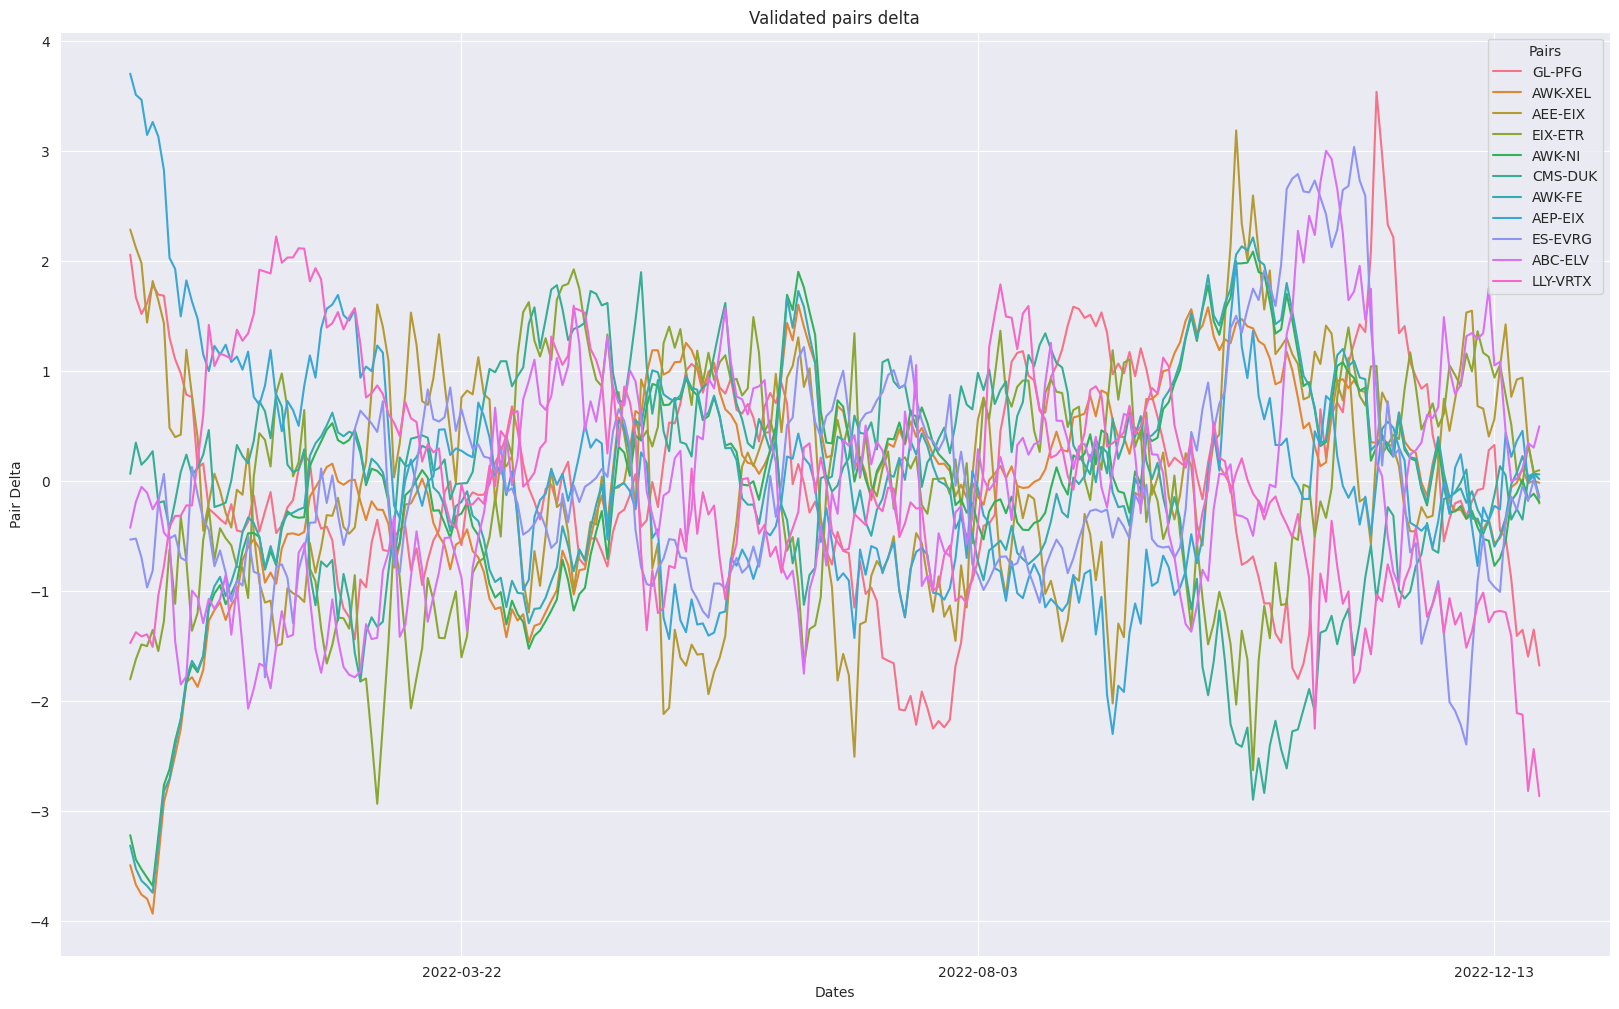

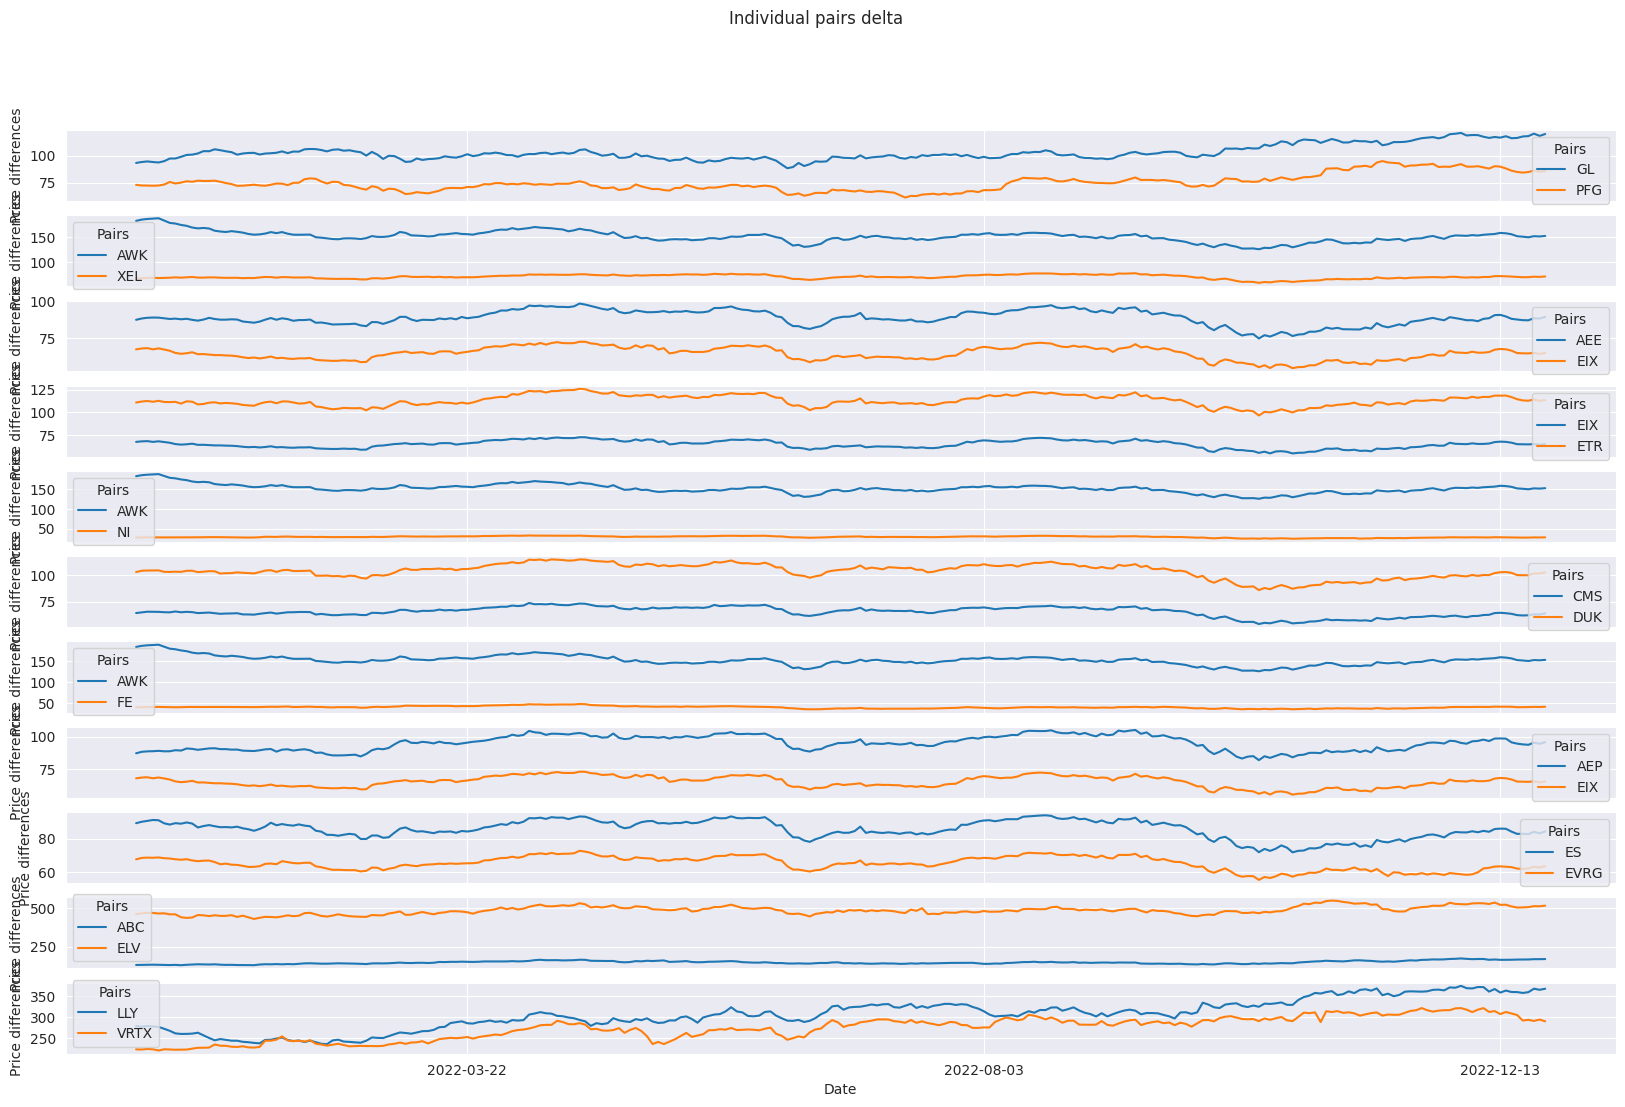

In [13]:

# Form the clusters, i.e. the potential pairs.
selector: PairClusters = PairClusters(prices_sp500, returns_sp500)
selector.optics()
potential_pairs = selector.create_potential_pairs(display_pairs_info=True)
#selector.plot_tsne()

# Create the strategy validator
validator = PairValidate(price_data=prices_sp500, pairs_data=potential_pairs)
validatedPairs = validator.apply_filters()
validator.visualize_pairs(individualize=False, normalize=True)
validator.visualize_pairs(individualize=True) # For common plots of pairs


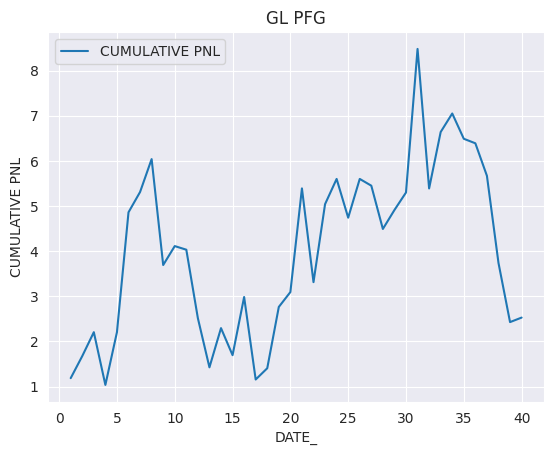

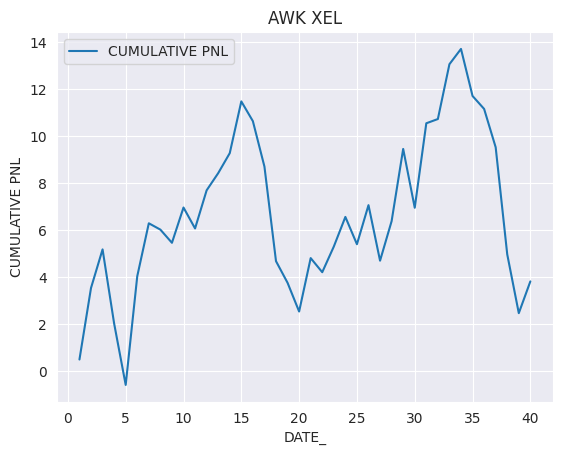

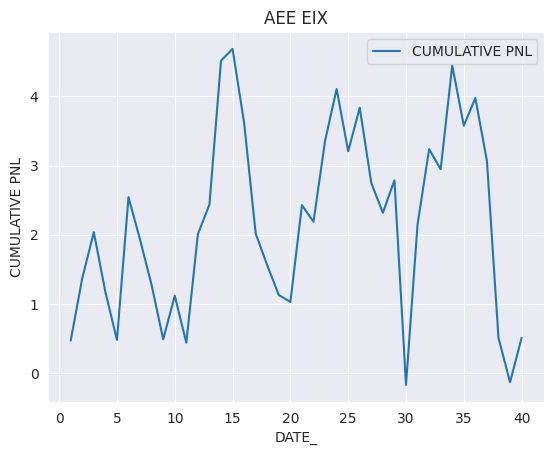

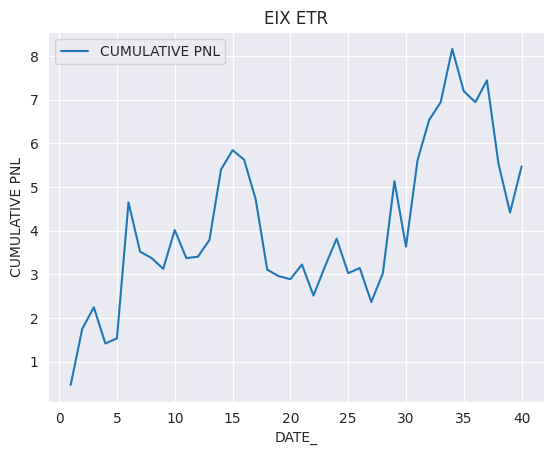

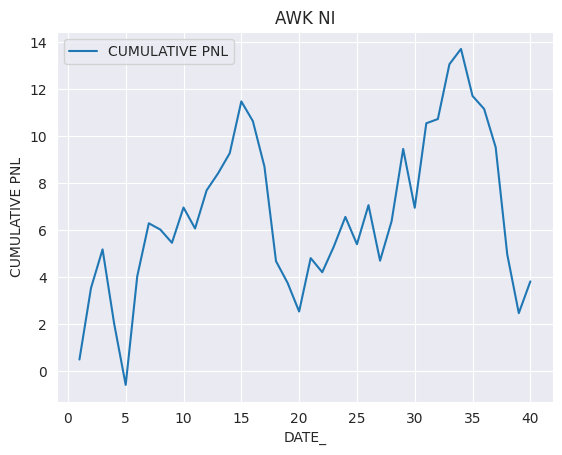

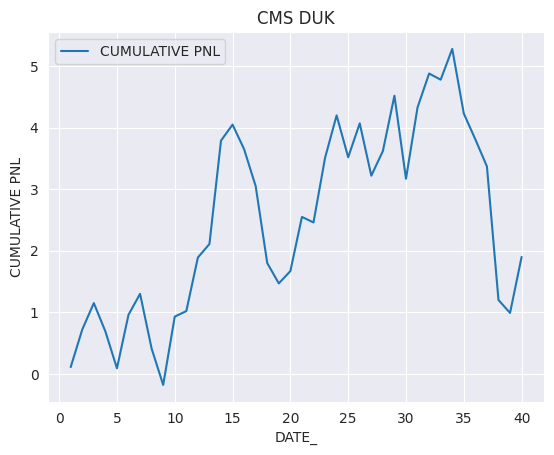

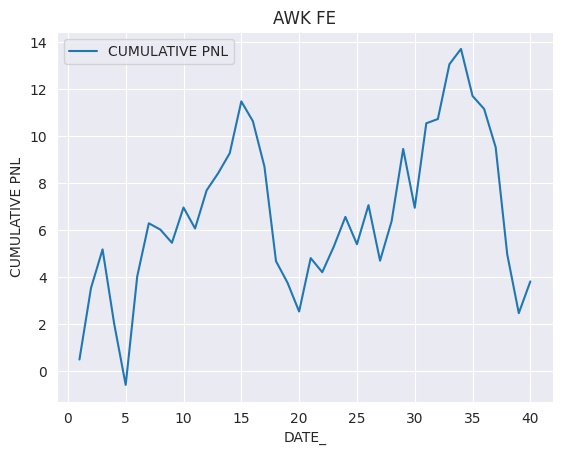

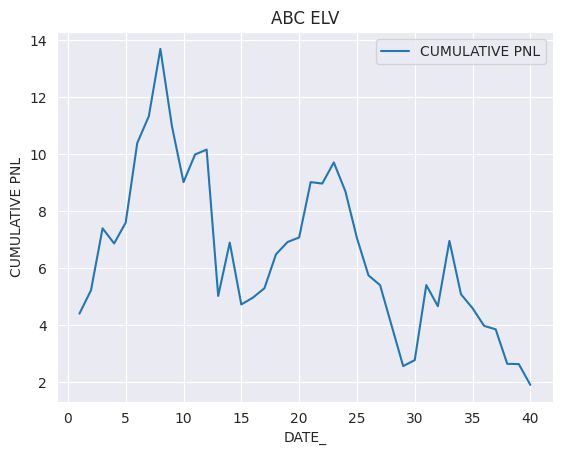

In [24]:
%reload_ext autoreload
%autoreload
import importlib
import OLS 
OLS = importlib.reload(OLS)
for pair in validatedPairs:
    OLS.doStrategy(pair[0],pair[1])